#### from https://github.com/ResidentMario/missingno (within https://goo.gl/AZAdmN)

In [18]:
!pip install missingno==0.5.1

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import missingno as msno

In [20]:
collisions = pd.read_csv("https://raw.githubusercontent.com/ResidentMario/missingno-data/master/nyc_collision_factors.csv")
collisions.head(3)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,11/10/2016,16:11:00,BROOKLYN,11208.0,40.662514,-73.872007,"(40.6625139, -73.8720068)",WORTMAN AVENUE,MONTAUK AVENUE,NaN,...,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,TAXI,PASSENGER VEHICLE,NaN,NaN,NaN
1,11/10/2016,05:11:00,MANHATTAN,10013.0,40.721323,-74.008344,"(40.7213228, -74.0083444)",HUBERT STREET,HUDSON STREET,NaN,...,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
2,04/16/2016,09:15:00,BROOKLYN,11201.0,40.687999,-73.997563,"(40.6879989, -73.9975625)",HENRY STREET,WARREN STREET,NaN,...,Lost Consciousness,Lost Consciousness,NaN,NaN,NaN,PASSENGER VEHICLE,VAN,NaN,NaN,NaN


In [21]:
# collisions = collisions.replace("nan", np.nan)
# collisions.head(3)

In [27]:
# collisions.sample(250)

In [30]:
collisions.sample(250).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 2188 to 5700
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DATE                           250 non-null    object 
 1   TIME                           250 non-null    object 
 2   BOROUGH                        235 non-null    object 
 3   ZIP CODE                       234 non-null    float64
 4   LATITUDE                       250 non-null    float64
 5   LONGITUDE                      250 non-null    float64
 6   LOCATION                       250 non-null    object 
 7   ON STREET NAME                 206 non-null    object 
 8   CROSS STREET NAME              205 non-null    object 
 9   OFF STREET NAME                30 non-null     object 
 10  NUMBER OF PERSONS INJURED      250 non-null    int64  
 11  NUMBER OF PERSONS KILLED       250 non-null    int64  
 12  NUMBER OF PEDESTRIANS INJURED  250 non-null   

<AxesSubplot:>

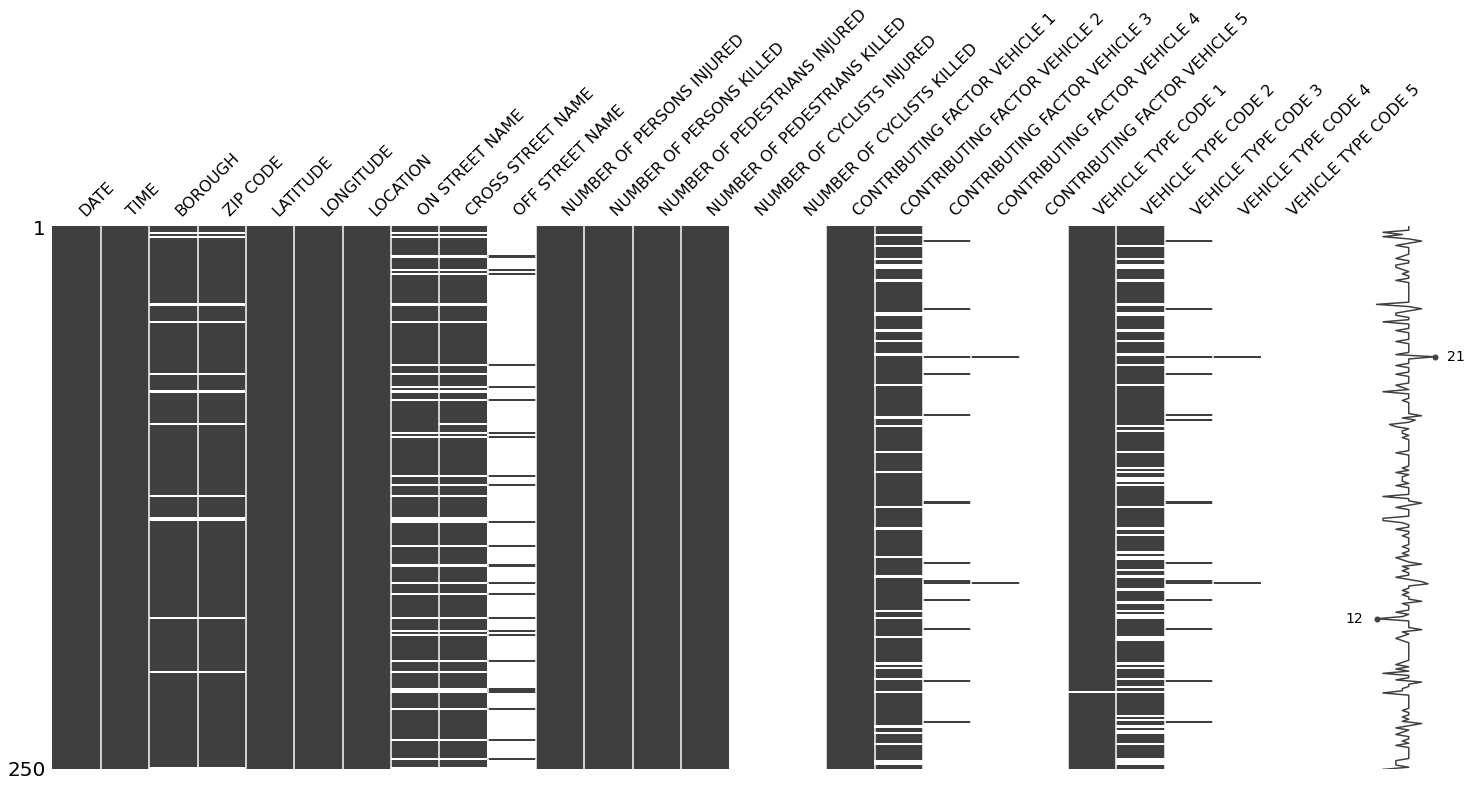

In [28]:
msno.matrix(collisions.sample(250))

# The sparkline at right summarizes the general shape of the data completeness and 
# points out the rows with the maximum and minimum nullity in the dataset.
# This visualization will comfortably accommodate up to 50 labelled variables. 
# Past that range labels begin to overlap or become unreadable, and by default large displays omit them.

<AxesSubplot:>

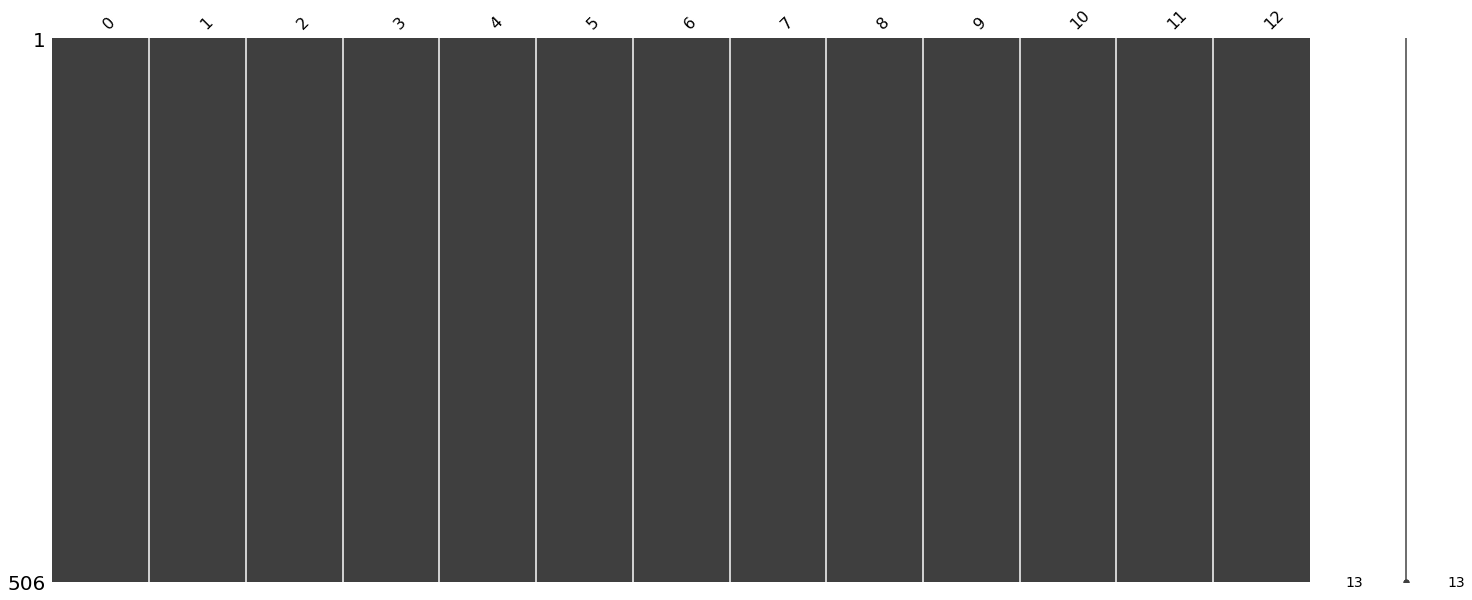

In [31]:
from sklearn import datasets

data = pd.DataFrame(datasets.load_boston().data)

msno.matrix(data)

In [32]:
# If you are working with time-series data, you can specify a periodicity using the freq keyword parameter:

null_pattern = (np.random.random(1000).reshape((50, 20)) > 0.5).astype(bool)

null_pattern = pd.DataFrame(null_pattern).replace({False: None})

null_pattern.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,None,True,None,None,True,None,None,True,True,True,None,True,True,True,None,True,True,True,True,True
1,True,True,None,True,True,True,True,None,None,True,True,True,None,True,None,True,None,None,True,None
2,None,True,None,None,None,None,None,None,None,None,True,None,None,None,True,None,True,True,True,True


<AxesSubplot:>

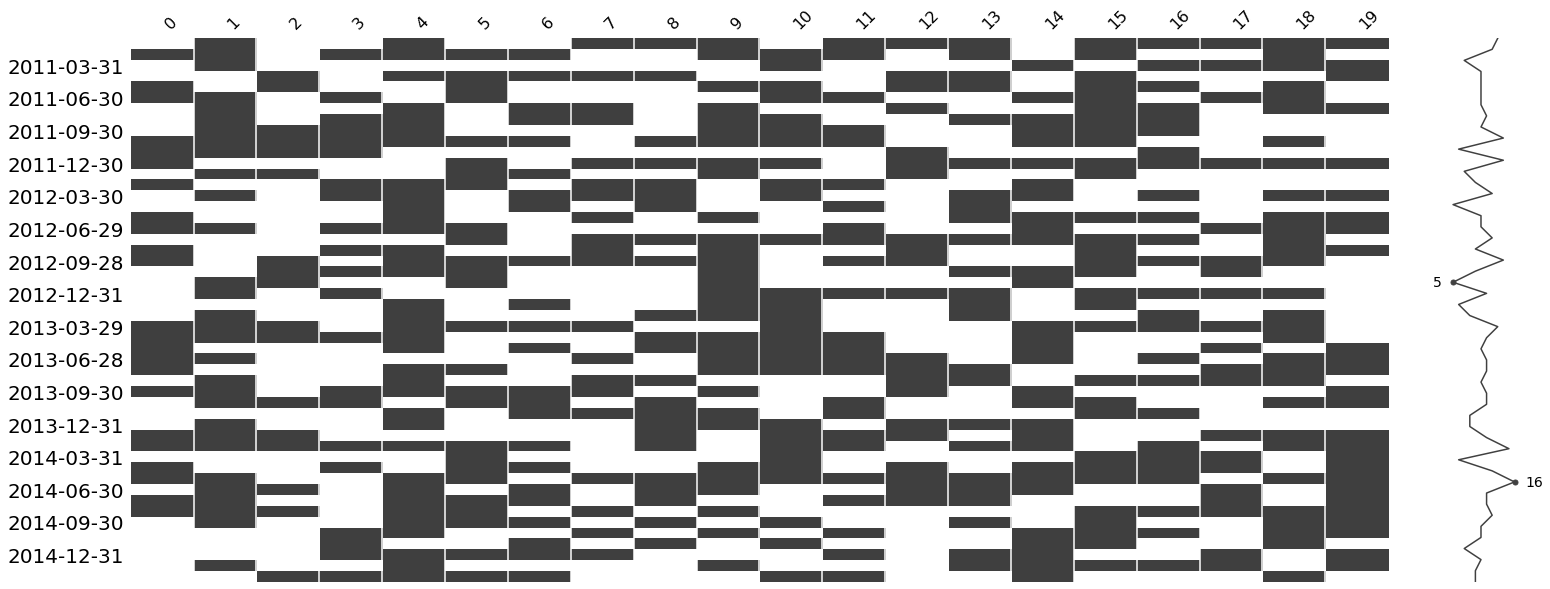

In [33]:
msno.matrix(null_pattern.set_index(pd.period_range('1/1/2011', '2/1/2015', freq='M')) , freq='BQ')

In [34]:
len(collisions)

7303

<AxesSubplot:>

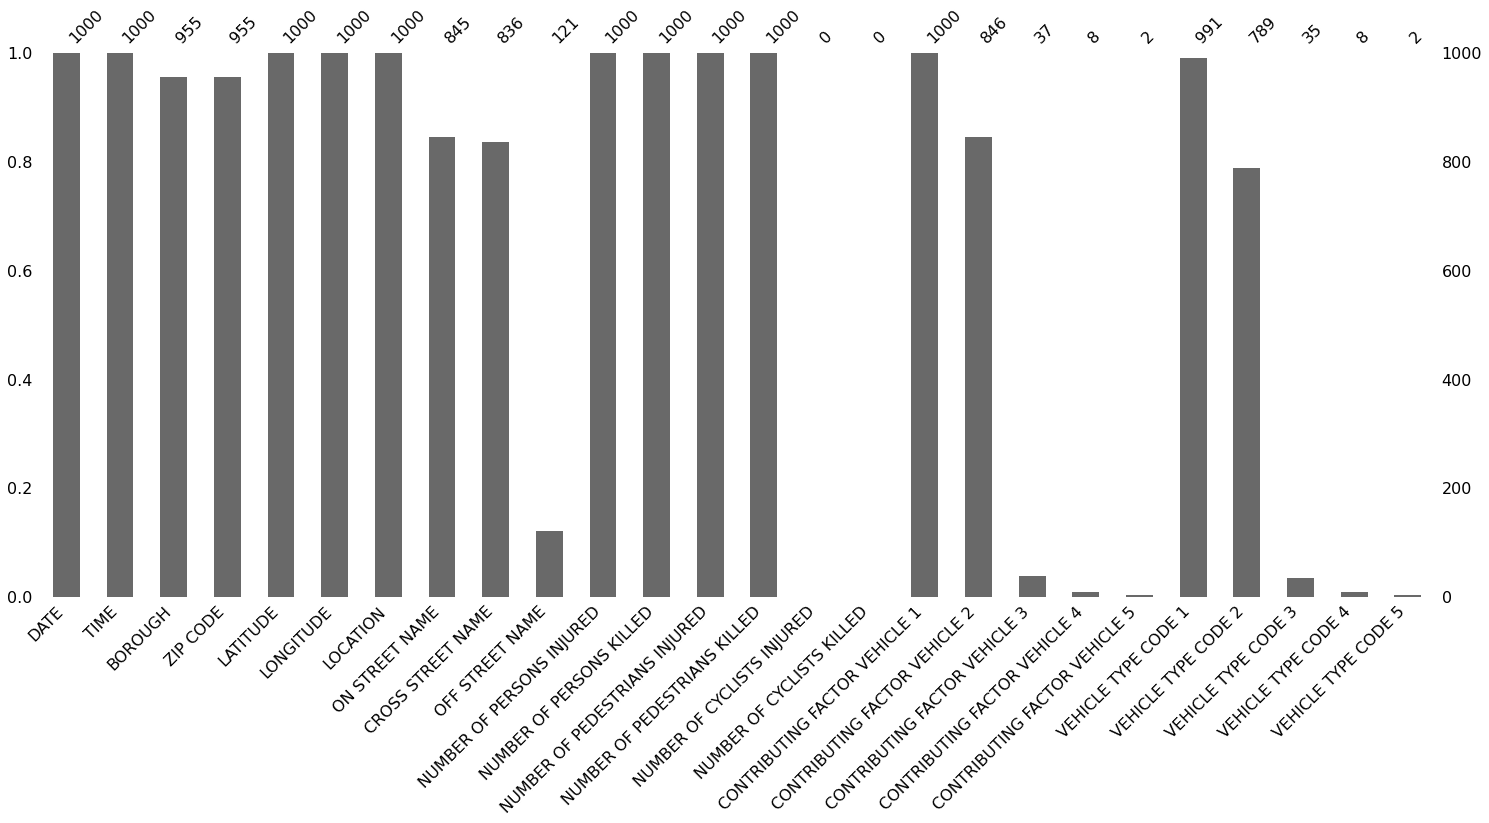

In [15]:
msno.bar(collisions.sample(1000))

<AxesSubplot:>

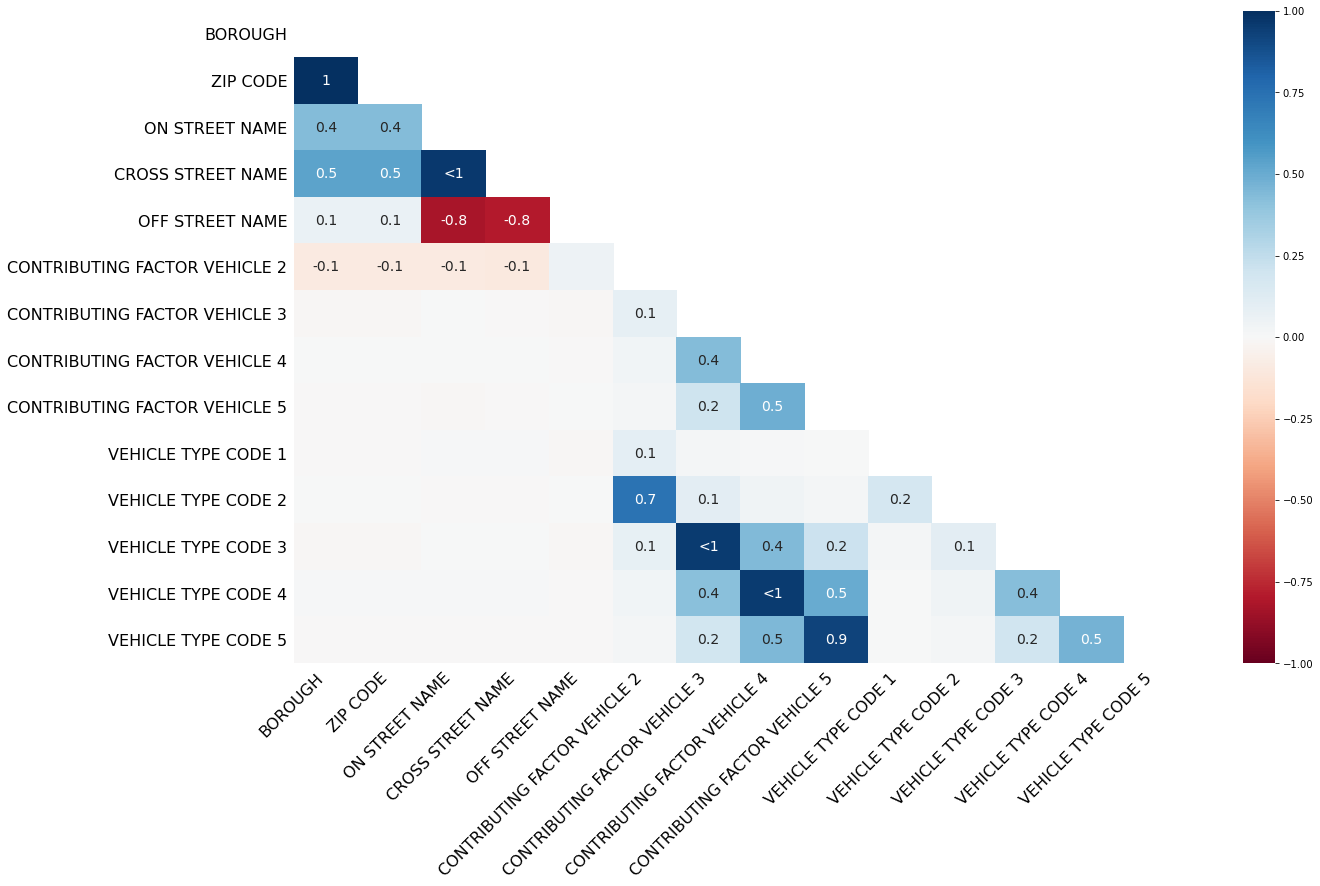

In [35]:
The missingno correlation heatmap measures nullity correlation: 

how strongly the presence or absence of one variable affects the presence of another

msno.heatmap(collisions)

In this example, it seems that reports which are filed with an OFF STREET NAME variable are less likely to have complete geographic data.

Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).

Variables that are always full or always empty have no meaningful correlation, and so are silently removed from the visualization—in this case for instance the datetime and injury number columns, which are completely filled, are not included.

Entries marked <1 or >-1 are have a correlation that is close to being exactingly negative or positive, but is still not quite perfectly so. This points to a small number of records in the dataset which are erroneous. For example, in this dataset the correlation between VEHICLE CODE TYPE 3 and CONTRIBUTING FACTOR VEHICLE 3 is <1, indicating that, contrary to our expectation, there are a few records which have one or the other, but not both. These cases will require special attention.

The heatmap works great for picking out data completeness relationships between variable pairs, but its explanatory power is limited when it comes to larger relationships and it has no particular support for extremely large datasets.

<AxesSubplot:>

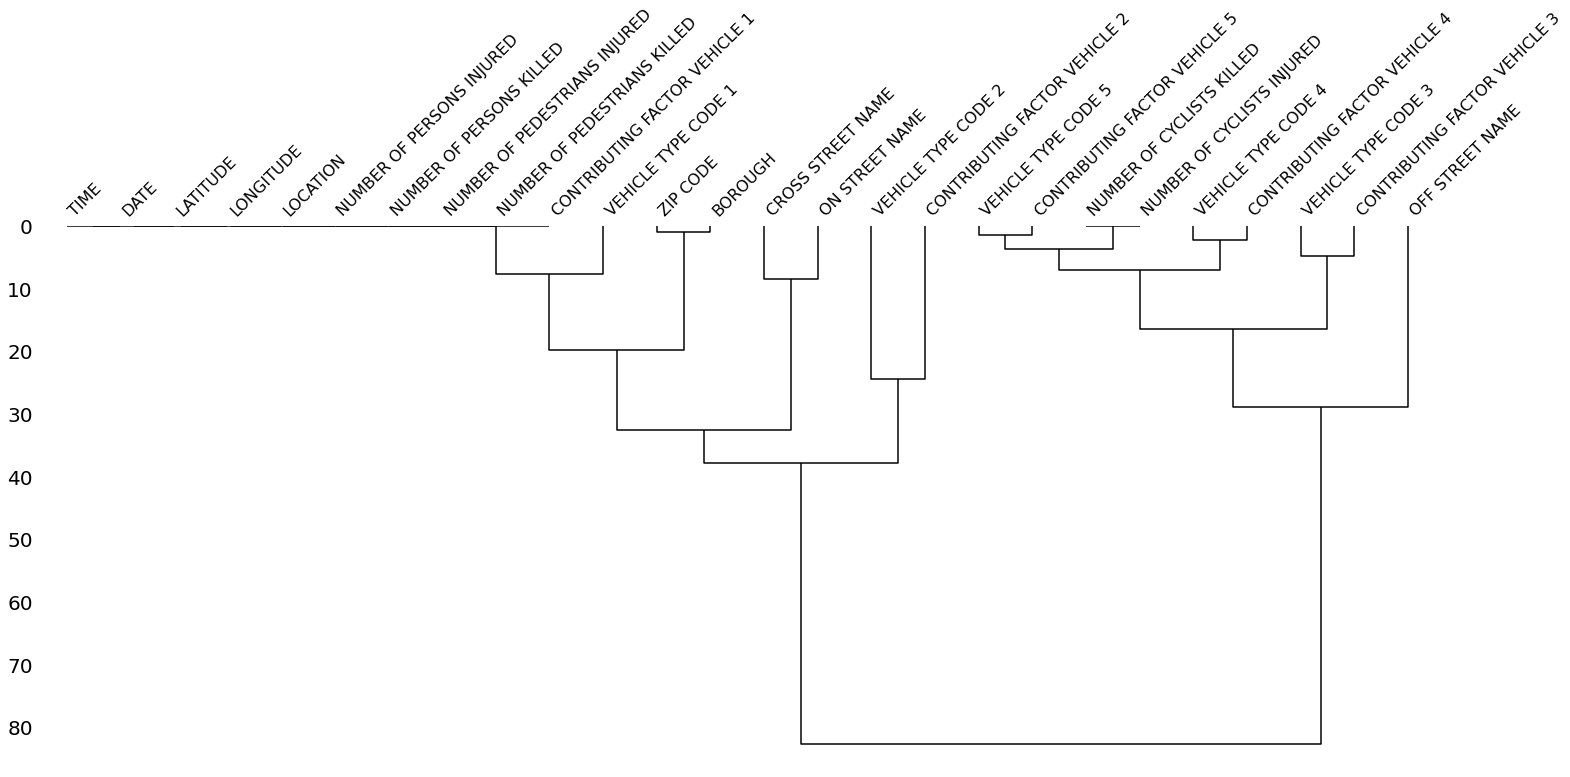

In [36]:
# The dendrogram allows you to more fully correlate variable completion, 
# revealing trends deeper than the pairwise ones visible in the correlation heatmap:

msno.dendrogram(collisions)

In [ ]:
# !pip install geoplot ('versioneer' 관련 에러 발생 시 : conda install geoplot -c conda-forge)

In [20]:
# msno.geoplot(collisions, x='LONGITUDE', y='LATITUDE')

In [21]:
# msno.geoplot(collisions, x='LONGITUDE', y='LATITUDE', by='ZIP CODE')